In [ ]:
#Linear regression by using Deep Neural network: Implement Boston housing price 
#prediction problem by Linear regression using Deep Neural network. Use Boston House price 
#prediction dataset.

In [6]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [7]:
df=pd.read_csv("HousingData.csv")

In [8]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [9]:
df.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
185,0.06047,0.0,2.46,0.0,0.488,6.153,68.8,3.2797,3,193,17.8,387.11,13.15,29.6
112,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6,432,17.8,394.95,16.21,18.8
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
61,0.17171,25.0,5.13,0.0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44,16.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [12]:
df.shape

(506, 14)

In [13]:
df.fillna(df.mean(), inplace=True)

In [14]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [15]:
df.shape

(506, 14)

<Axes: >

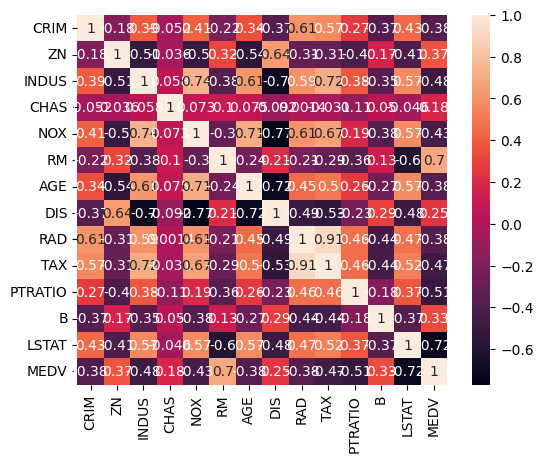

In [16]:
sns.heatmap(df.corr(),annot=True,square=True)

In [17]:
X = df.drop(['MEDV'], axis = 1)
y = df['MEDV']

In [18]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [19]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [20]:
x_train.shape, x_test.shape

((354, 13), (152, 13))

In [21]:
from keras.models import Sequential
from keras.layers import Dense

In [22]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(13,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
   
    Dense(1)  
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

C:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,673 (49.50 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.fit(x_train,y_train,epochs=150,batch_size=32,validation_split=0.03)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 543.4186 - mae: 21.5382 - val_loss: 600.9001 - val_mae: 22.6886
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 528.3307 - mae: 21.1785 - val_loss: 539.8512 - val_mae: 21.3510
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 442.7665 - mae: 18.9396 - val_loss: 426.9048 - val_mae: 18.5996
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 324.0005 - mae: 16.0288 - val_loss: 247.7482 - val_mae: 13.0845
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 141.9419 - mae: 9.9946 - val_loss: 94.2154 - val_mae: 7.0736
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 75.0547 - mae: 6.7333 - val_loss: 78.7734 - val_mae: 5.7381
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 50.8924 - mae: 5.1480 - val_loss: 88.5948 - val_mae: 5.8172
Epoch 8/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 34.9694 - mae: 4.4086 - val_loss: 75.4595 - val_mae: 5.5818
Epoch 9/150
11/11 ━━━━━

In [24]:
loss,mae=model.evaluate(x_test,y_test,verbose=0)
print(f"Mean Squared Error",loss)
print(f"Mean Absolute Error", mae)

Mean Squared Error 17.400211334228516
Mean Absolute Error 2.689560651779175


In [25]:
predictions = model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [26]:
# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE: ",rmse)
# Compute R² Score
r2 = r2_score(y_test, predictions)
print(f"R2 Score : ",r2)

RMSE:  4.171356057501446
R2 Score :  0.8217802588504497


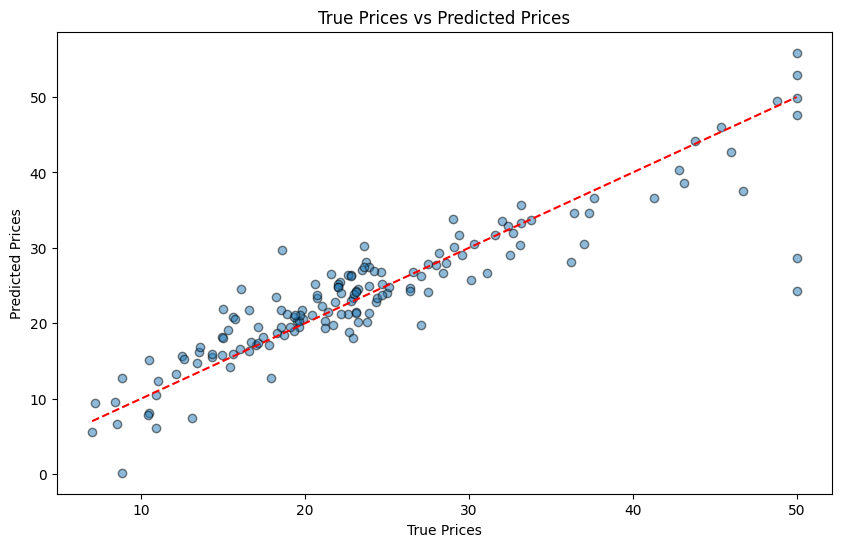

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions,alpha=0.5, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="dashed")  
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()

In [28]:
# Predictions 

predicted_value = model.predict(x_test[0].reshape(1, -1))
print(f"Prediction for X_test[{0}]: {predicted_value[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction for X_test[0]: [26.630524]
